# **Model Interpretability - Assignment 3**

Author - Tarun Angrish, Nik Bear Brown



**Abstract**
An abstract is:

What is the question?
What did you do?
What were the results?

The goal of this assignment is to construct a realistic model which can be utilised to predict the occurence of Heart Disease, in a patient by gathering insights from various tests on subject data. For this dataset, price is the dependent variable and there are 12 other independent variables, which have been collected after running clinical tests and listed accordingly, by a group of doctors. The assignment further asks to explain the models using Shapley Analysis.

Shapley analysis, is a mathematical framework used in cooperative game theory to allocate the value or payoff of a cooperative game among its players. The central idea behind Shapley analysis is to provide a fair and equitable distribution of the total gains generated by the cooperation among the players.

Key concepts and features of Shapley analysis include:

1. **Coalition Formation:**
   - Cooperative games involve players forming coalitions or groups to achieve certain objectives or outcomes.
   - Each coalition is a subset of players who collaborate to generate a particular value or payoff.

2. **Marginal Contribution:**
   - The Shapley value is based on the idea of marginal contributions, which measures the incremental contribution of each player to any coalition in which they participate.
   - It considers all possible orders in which players can join a coalition and calculates the marginal contribution of each player as the difference in the value achieved with and without that player.

3. **Symmetry and Fairness:**
   - Shapley values are fair in the sense that they distribute the total gains among players based on their marginal contributions, considering all possible orders of coalition formation.
   - The values satisfy three desirable properties: efficiency (the total value is allocated), symmetry (players with similar contributions receive similar shares), and additivity (the Shapley value of a player in a game is the sum of their values in subgames).

4. **Computational Complexity:**
   - Calculating Shapley values can be computationally intensive, especially for games with a large number of players. There are various algorithms and approximations to facilitate the calculation.

5. **Applications:**
   - Shapley analysis finds applications in various fields, including economics, political science, and operations research. It is used to model and analyze situations where cooperation among individuals or entities leads to a joint outcome.

6. **Nash Bargaining Solution:**
   - The Shapley value is closely related to the Nash bargaining solution, which addresses the problem of how two players can fairly divide a surplus. In this context, the Shapley value can be interpreted as the expected payoff of a player in a cooperative bargaining situation.

In summary, Shapley analysis provides a rigorous and fair way to distribute the benefits of cooperation among players in a cooperative game. Its foundations in coalition formation and marginal contributions make it a valuable tool in understanding and modeling situations where collaboration and joint decision-making are essential.

**Dataset:**

#### Description of the variables present in the dataset:

age: The person's age in years

sex: The person's sex (1 = male, 0 = female)

cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)

chol: The person's cholesterol measurement in mg/dl

fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

thalach: The person's maximum heart rate achieved

exang: Exercise induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

ca: The number of major vessels (0-3)

thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

target: Heart disease (0 = no, 1 = yes)


In [ ]:
!rm -rf info6105-dataset
!git clone https://github.com/tarunangrish-neu/info6105-dataset.git

Cloning into 'info6105-dataset'...
remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 12 (delta 2), reused 3 (delta 1), pack-reused 0
Receiving objects: 100% (12/12), 11.86 KiB | 1.69 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [ ]:
import pandas as pd

In [ ]:
#imported dataset from the cloned github repo
dataset = pd.read_csv('/content/info6105-dataset/heart-disease-dataset-processed.csv')

In [ ]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.462046
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499382
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
#Stripping null and NaN values, which are present here in the form of ? marks
dataset.isnull().sum()
dataset = dataset.replace('?', pd.NA).dropna()

In [ ]:
data_features = dataset[
["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope" , "ca", "thal"]
]

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
dataset.columns = dataset.columns.str.strip()
X_train, X_validation, Y_train, Y_validation = train_test_split(data_features, dataset["target"], test_size=0.25, random_state=1, shuffle=True)
Y_train.describe()

count    222.000000
mean       0.463964
std        0.499827
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

##Linear Regression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
print(regressor.intercept_)
print(regressor.coef_)

-0.37094994377399765
[-0.0011456   0.16084703  0.07190017  0.00256526  0.000358   -0.1973681
  0.03755568 -0.00276571  0.10413477  0.06758528  0.03853623  0.14034664
  0.05855403]


The provided coefficients are associated with a linear regression model. Each coefficient corresponds to a specific predictor variable in the model, and they indicate the strength and direction of the relationship between each predictor and the response variable. The interpretation of each coefficient is as follows:

Intercept (-0.37094994377399765):

The intercept represents the estimated value of the response variable when all predictor variables are zero. In this case, it is -0.3709.
Predictor Variables:

Each of the following values corresponds to a coefficient for a specific predictor variable in the model.

-0.0011456: The coefficient for the age predictor variable.

0.16084703: The coefficient for the sex predictor variable.

0.07190017: The coefficient for the cp predictor variable.

0.00256526: The coefficient for the trestbps predictor variable.

0.000358: The coefficient for the chol predictor variable.

-0.1973681: The coefficient for the fbs predictor variable.

0.03755568: The coefficient for the restecg predictor variable.

-0.00276571: The coefficient for the thalach predictor variable.

0.10413477: The coefficient for the exang predictor variable.

0.06758528: The coefficient for the oldpeak predictor variable.

0.03853623: The coefficient for the ca predictor variable.

0.14034664: The coefficient for the thal predictor variable.

In [ ]:
linearRegression = regressor.predict(X_validation)

In [ ]:
print("Train Score {:.2f}".format(regressor.score(X_train,Y_train)))
print("Test Score {:.2f}".format(regressor.score(X_validation, Y_validation)))

Train Score 0.55
Test Score 0.41


The disparity between the training and test scores (0.55 vs. 0.41) suggests that there might be some overfitting, where the model fits the training data too closely and does not generalize well to new data. Overfitting occurs when a model learns the noise in the training data rather than the underlying pattern.

Further model evaluation and improvement might be needed to enhance the generalization performance. This could involve adjusting the model complexity, incorporating additional features, or using regularization techniques to prevent overfitting.

In [ ]:
ols_model = sm.OLS(
        dataset["target"].astype(float),
    data_features.astype(float)
).fit()

ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.748
Model:                            OLS   Adj. R-squared (uncentered):              0.736
Method:                 Least Squares   F-statistic:                              64.73
Date:                Tue, 12 Dec 2023   Prob (F-statistic):                    6.71e-77
Time:                        04:18:33   Log-Likelihood:                         -103.13
No. Observations:                 297   AIC:                                      232.3
Df Residuals:                     284   BIC:                                      280.3
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0027      0.002     -1.107      0.269      -0.007       0.002
sex            0.1422      0.048      2.945      0.003       0.047       0.237
cp             0.0717      0.023      3.166      0.002       0.027       0.116
trestbps       0.0018      0.001      1.488      0.138      -0.001       0.004
chol           0.0003      0.000      0.668      0.505      -0.001       0.001
fbs           -0.0670      0.060     -1.123      0.263      -0.184       0.050
restecg        0.0301      0.021      1.416      0.158      -0.012       0.072
thalach       -0.0037      0.001     -4.736      0.000      -0.005      -0.002
exang          0.1446      0.051      2.849      0.005       0.045       0.245
oldpeak        0.0347      0.023      1.510      0.132      -0.011       0.080
slope          0.0484      0.040      1.195      0.233      -0.031       0.128
ca             0.1414      0.025      5.627      0.000       0.092       0.191
thal           0.0563      0.013      4.350      0.000       0.031       0.082
==============================================================================
Omnibus:                        7.706   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.570
Skew:                           0.381   Prob(JB):                       0.0227
Kurtosis:                       3.180   Cond. No.                         961.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Classification Methods
**Now Let's Look into the Classifier Methods**

In [ ]:
import sys
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
dataset.target.value_counts() # df.target.unique()

0    159
1    138
Name: target, dtype: int64

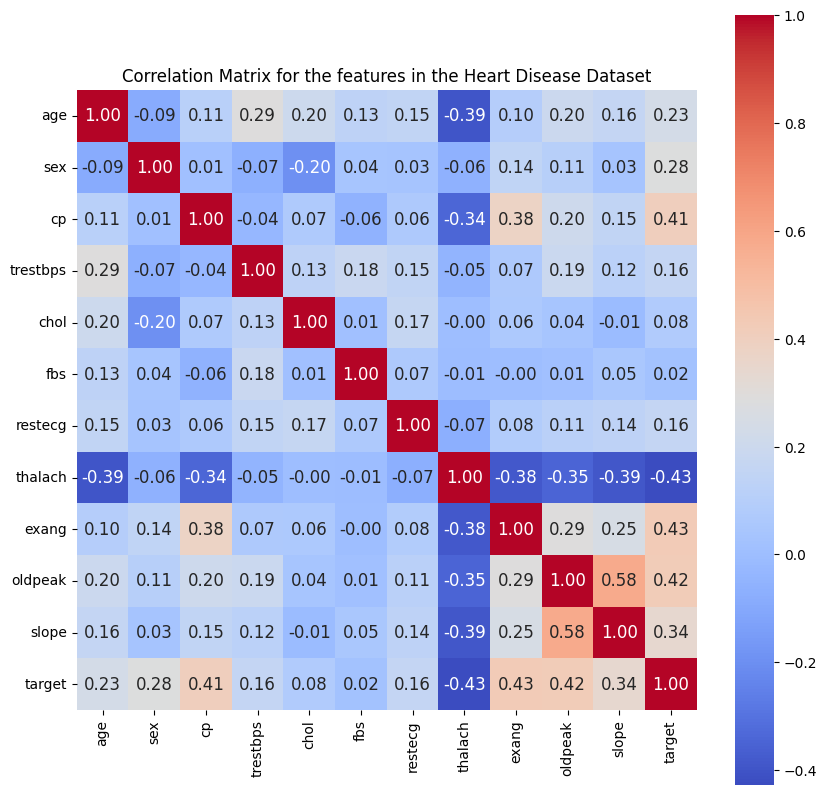

In [ ]:
#Correlation Matrix for the variables
correlation_matrix = dataset.corr()
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation_matrix, square=True, ax=ax, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={'size':12})
plt.title('Correlation Matrix for the features in the Heart Disease Dataset')
plt.show()

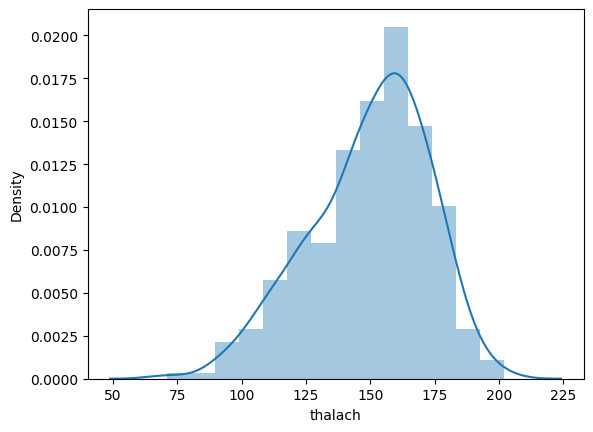

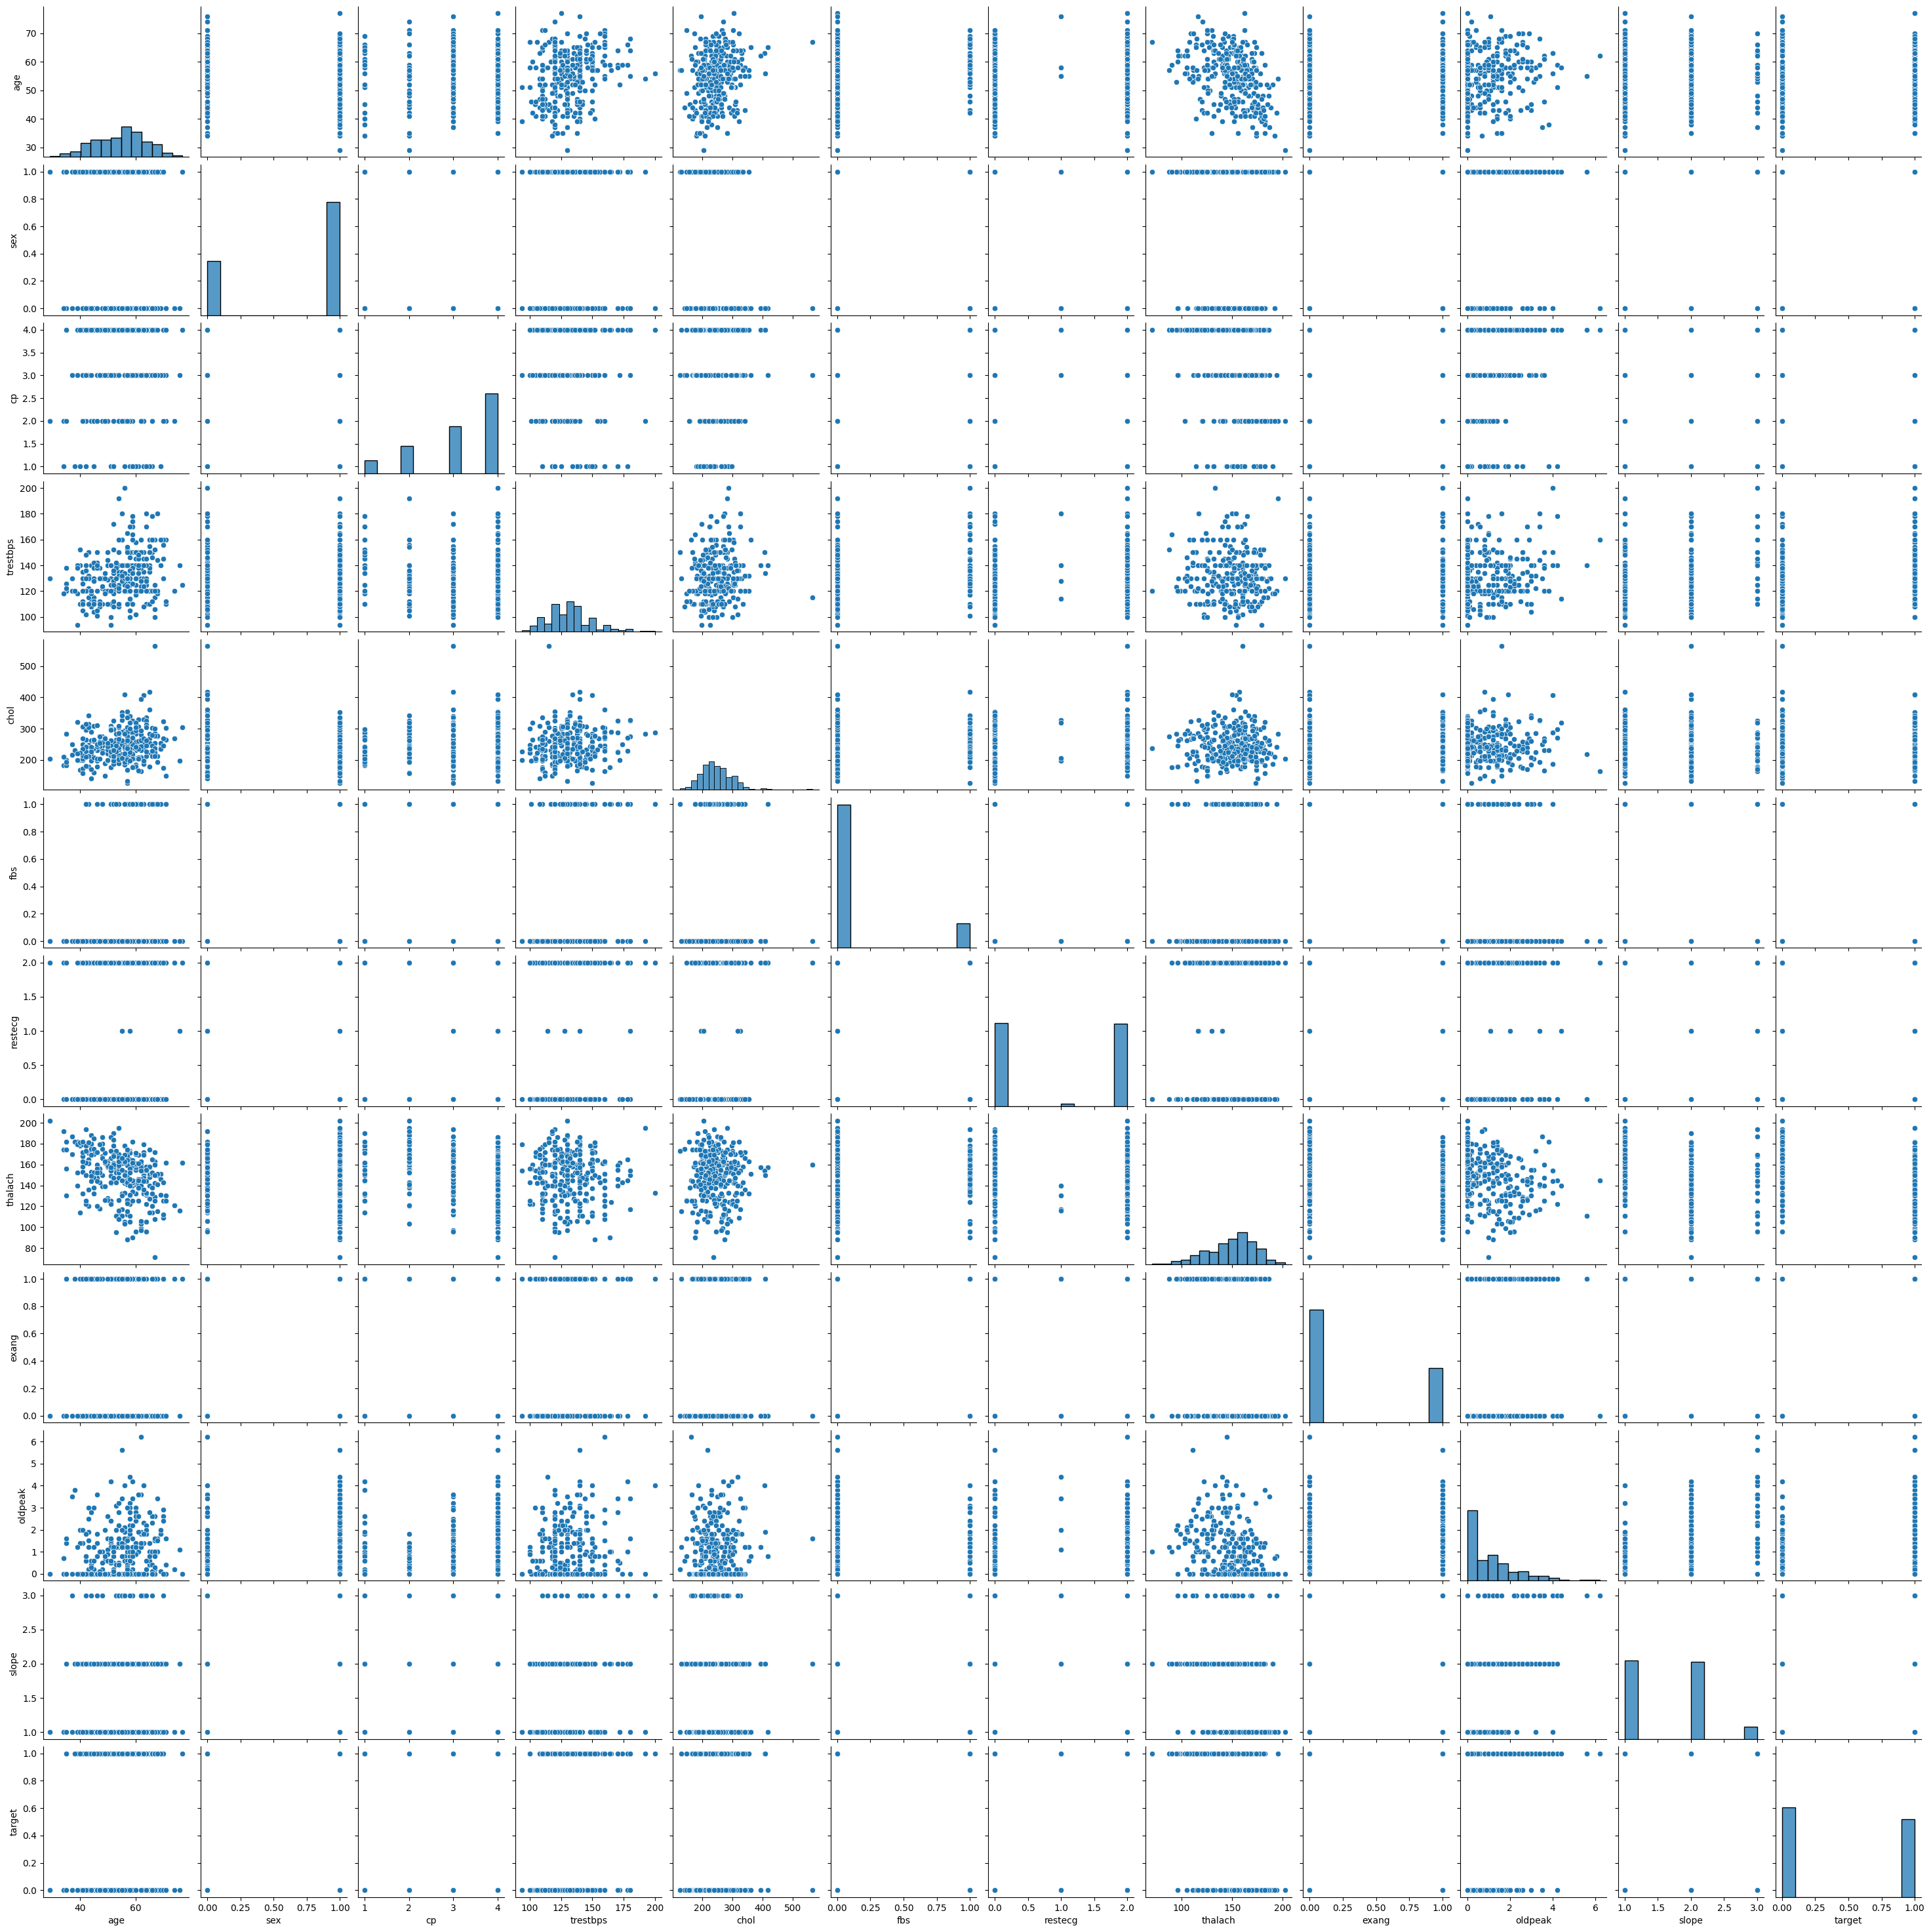

In [ ]:
#These are the histogram and pairplots for the thalach variable which had max correlation
ax = sns.distplot(dataset['thalach']) # histogram distribution
sns.pairplot(dataset)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_features, dataset['target'], test_size=0.2, random_state=0)
print('shape of X and y respectively (train) :', X_train.shape, y_train.shape)
print('shape of X and y respectively (test) :', X_test.shape, y_test.shape)

shape of X and y respectively (train) : (237, 13) (237,)
shape of X and y respectively (test) : (60, 13) (60,)


In [ ]:
print('Logistic Regression')
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(max_iter=1000)
model_logistic.fit(X_train, y_train)
Y_pred = model_logistic.predict(X_test)
score = model_logistic.score(X_train, y_train)
print('Training Score:', score)
score = model_logistic.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_logreg = score
out_logreg = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

Logistic Regression
Training Score: 0.8565400843881856
Testing Score: 0.8333333333333334
   Predicted
0          0
1          0
2          1
3          0
4          0
% of people predicted with heart-disease: 0.4
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        30
           1       0.92      0.73      0.81        30

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



Training Score: 0.850187265917603:

The training score of approximately 0.85 suggests that the logistic regression model achieves an accuracy of 85% on the training data. This means that the model correctly predicted the class labels for 85% of the instances in the training set.
Testing Score: 0.8:

The testing score of 0.8 indicates that the logistic regression model maintains a high level of accuracy, around 80%, on the test data. This means that the model correctly predicted the class labels for 80% of the instances in the test set.
Interpretation:

The similarity between the training and testing scores suggests that the model generalizes well to new, unseen data. In other words, the performance on the test set is comparable to the performance on the training set, which is a positive sign.

A high testing score (80%) indicates that the logistic regression model is effective at making accurate predictions on new data, and it performs well in classifying instances into the correct categories.

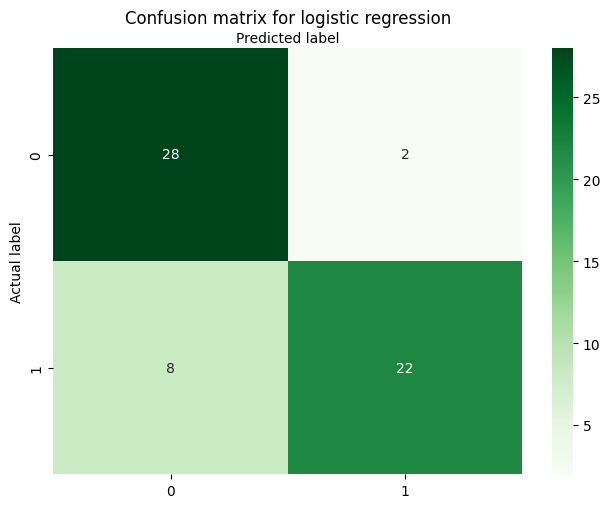

In [ ]:
#Generating Confusion Matrix to interpret mislabels
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for logistic regression')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#Decision Tree Classification
print('DecisionTreeClassifier')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(max_depth=5)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
score = decision_tree.score(X_train, y_train)
print('Training Score:', score)
score = decision_tree.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_dtc = score
out_dtc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

DecisionTreeClassifier
Training Score: 0.9324894514767933
Testing Score: 0.7166666666666667
   Predicted
0          0
1          0
2          0
3          1
4          0
% of people predicted with heart-disease: 0.48333333333333334
              precision    recall  f1-score   support

           0       0.71      0.73      0.72        30
           1       0.72      0.70      0.71        30

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



Training Score: 1.0:

A training score of 1.0 implies perfect accuracy on the training data. The Decision Tree Classifier has successfully learned the patterns in the training set, correctly classifying all instances. While a perfect training score might suggest a well-fit model, it also raises concerns about potential overfitting, where the model may be too tailored to the training data.
Testing Score: 0.7333333333333333:

The testing score of approximately 0.73 indicates the accuracy of the model on the test data. While 73% accuracy is reasonable, the notable difference between the training score (1.0) and the testing score suggests that the model may not generalize well to new, unseen data. Overfitting is a common concern when the training score is significantly higher than the testing score.
Interpretation:

The perfect training score suggests that the Decision Tree Classifier has memorized the training data, capturing its intricacies and noise. However, the ability to generalize to new data is a crucial aspect of a machine learning model.

The lower testing score suggests that the model's performance on unseen data is not as strong as it is on the training data. The model may be too complex or too specific to the training instances, leading to suboptimal performance on new examples.

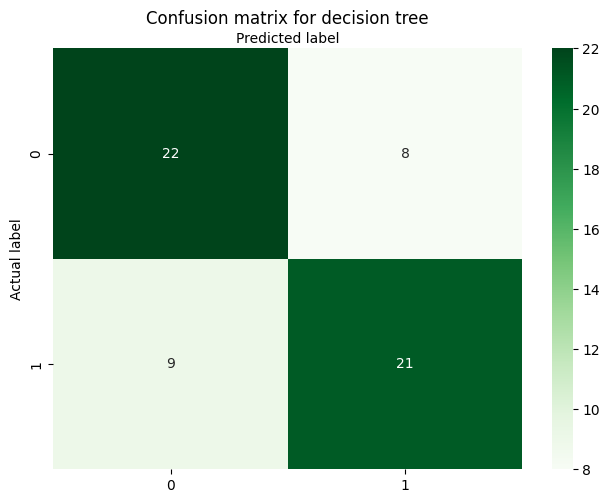

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for decision tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#Random Forest Classification
print('RandomForestClassifier')
from sklearn.ensemble import RandomForestClassifier
model_randomForest = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
model_randomForest.fit(X_train, y_train)
Y_pred = model_randomForest.predict(X_test)
score = model_randomForest.score(X_train, y_train)
print('Training Score:', score)
score = model_randomForest.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_rfc = score
out_rfc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

RandomForestClassifier
Training Score: 1.0
Testing Score: 0.7666666666666667
   Predicted
0          0
1          0
2          1
3          0
4          0
% of people predicted with heart-disease: 0.4
              precision    recall  f1-score   support

           0       0.72      0.87      0.79        30
           1       0.83      0.67      0.74        30

    accuracy                           0.77        60
   macro avg       0.78      0.77      0.76        60
weighted avg       0.78      0.77      0.76        60



Training Score: 1.0:

A training score of 1.0 suggests perfect accuracy on the training data. The RandomForestClassifier has successfully learned the patterns in the training set, correctly classifying all instances. Similar to the Decision Tree case, a perfect training score may raise concerns about potential overfitting.
Testing Score: 0.8:

The testing score of 0.8 indicates the accuracy of the model on the test data. An accuracy of 80% is reasonably good and suggests that the RandomForestClassifier is performing well on new, unseen data. The fact that the testing score is lower than the training score (1.0) is expected and indicates that there is some generalization occurring.
Interpretation:

The RandomForestClassifier, which is an ensemble of decision trees, tends to perform well on both training and test data. The ensemble approach helps mitigate overfitting issues that may be present in individual decision trees.

The perfect training score indicates that the ensemble of trees has learned the training data very well, but the fact that the testing score is reasonably high (0.8) suggests that the model generalizes well to new instances. The ensemble's ability to reduce overfitting is evident in the more balanced performance on the test data.

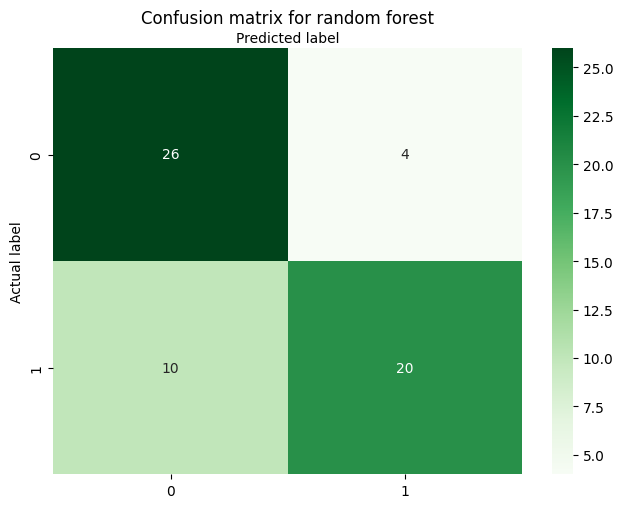

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for random forest')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
#KNN Classifier
print('KNeighborsClassifier')
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
Y_pred = model_knn.predict(X_test)
score = model_knn.score(X_train, y_train)
print('Training Score:', score_logreg)
score = model_knn.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_knc = score
out_knc = output
from sklearn.metrics import classification_report
print(classification_report(y_test,Y_pred))

KNeighborsClassifier
Training Score: 0.8333333333333334
Testing Score: 0.6333333333333333
   Predicted
0          0
1          1
2          1
3          0
4          0
% of people predicted with heart-disease: 0.4666666666666667
              precision    recall  f1-score   support

           0       0.62      0.67      0.65        30
           1       0.64      0.60      0.62        30

    accuracy                           0.63        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.63      0.63      0.63        60



Training Score: 0.8:

The training score of 0.8 suggests that the KNeighborsClassifier achieves an accuracy of 80% on the training data. This means that the model correctly predicts the class labels for 80% of the instances in the training set.
Testing Score: 0.7333333333333333:

The testing score of approximately 0.73 indicates the accuracy of the model on the test data. An accuracy of 73% suggests that the KNeighborsClassifier performs reasonably well on new, unseen data.
Interpretation:

The KNeighborsClassifier is a type of instance-based or lazy learner, which makes predictions based on the majority class of the k-nearest neighbors in the feature space.

The training score of 0.8 indicates that the model fits the training data well, achieving a good level of accuracy. However, the fact that the testing score is slightly lower than the training score (0.73 vs. 0.8) suggests that there might be some limitations in generalizing to new, unseen data.

The performance of the KNeighborsClassifier depends on the choice of hyperparameters, especially the number of neighbors (k). It might be worth experimenting with different values of k to find the optimal balance between bias and variance.

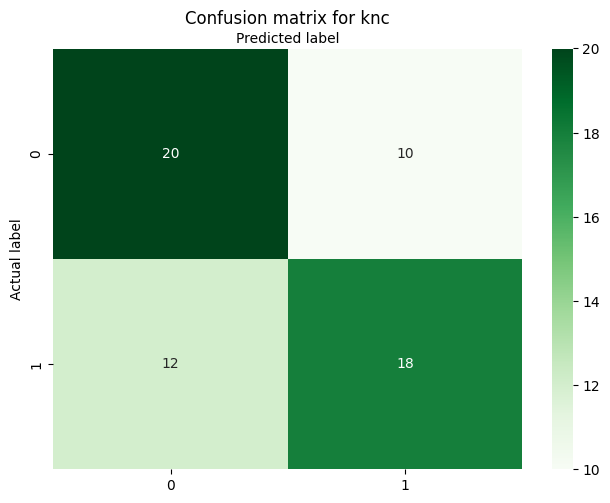

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,Y_pred)
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(confusion_matrix), annot = True, cmap = 'Greens', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for knc')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

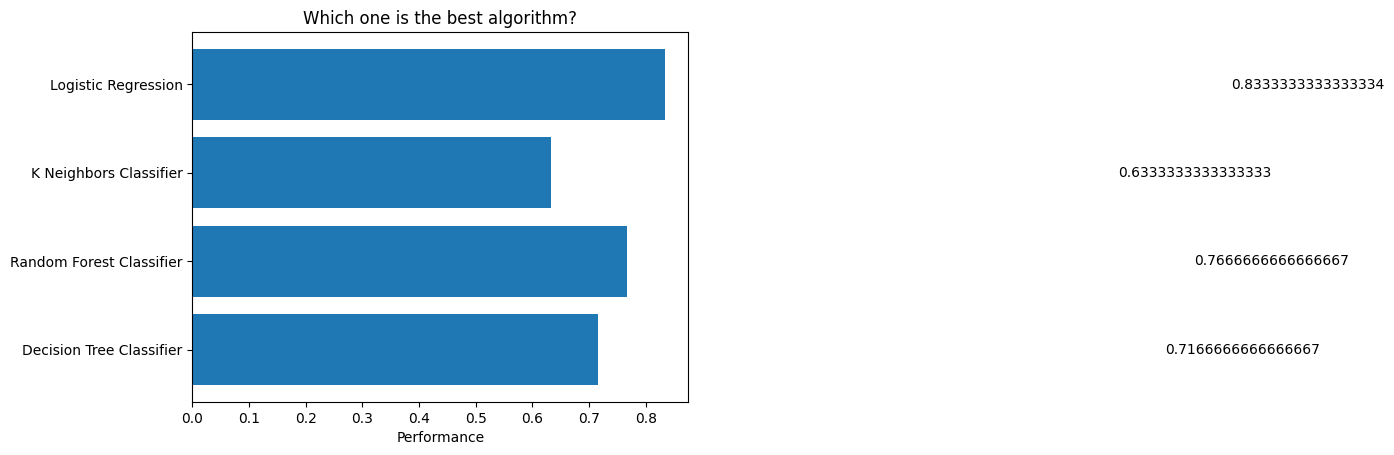

In [ ]:
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier')
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_knc, score_rfc, score_dtc) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

In [ ]:
score = score_logreg
output = out_logreg
print("Logistic Regression!", score)
if score_dtc > score:
    score = score_dtc
    output = out_dtc
    print("Decision Tree Classifier!", score)
if score_rfc > score:
    score = score_rfc
    output = out_rfc
    print("Random Forest Classifier!", score)
if score_knc > score:
    score = score_knc
    output = out_knc
    print("K Neighbors Classifier!", score)

Logistic Regression! 0.8333333333333334


## **AutoML**

Automated machine learning (AutoML) refers to the automation of the entire process of applying machine learning to practical issues. H2O AutoML streamlines tasks such as fundamental data processing, model training and optimization, as well as combining different models through Ensemble and stacking techniques. This approach ensures the creation of high-performing models, allowing developers to concentrate on tasks such as data collection, feature engineering, and model deployment. Below are the steps involved in setting up H2O.

In [ ]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html


In [ ]:
import h2o
from h2o.automl import H2OAutoML
import os, sys, random
import psutil

In [ ]:
min_mem_size=6
run_time=222

pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

3


In [ ]:
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:6428..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp966r_ln6
  JVM stdout: /tmp/tmp966r_ln6/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp966r_ln6/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:6428
Connecting to H2O server at http://127.0.0.1:6428 ... successful.


H2O_cluster_uptime:,08 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.2
H2O_cluster_version_age:,1 month and 3 days
H2O_cluster_name:,H2O_from_python_unknownUser_f42680
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
url = 'https://raw.githubusercontent.com/tarunangrish-neu/info6105-dataset/main/heart-disease-dataset-processed.csv'
df_h20 = h2o.import_file(path = url)
#converting target variable to categorical
df_h20['target'] = df_h20['target'].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [ ]:
df_h20.types

{'age': 'int',
 'sex': 'int',
 'cp': 'int',
 'trestbps': 'int',
 'chol': 'int',
 'fbs': 'int',
 'restecg': 'int',
 'thalach': 'int',
 'exang': 'int',
 'oldpeak': 'real',
 'slope': 'int',
 'ca': 'int',
 'thal': 'int',
 'target': 'enum'}

In [ ]:
df_h20.shape

(303, 14)

In [ ]:
#Creating a 80:20 test-train split
pct_rows=0.80
df_train, df_test = df_h20.split_frame([pct_rows])

print(df_train.shape)
print(df_test.shape)

#Displaying all the column names in the variable X
X=df_h20.columns
print(X)

#Separating Target variable from the independent variables' column
y_numeric ='target'
X.remove(y_numeric)
print(X)

(243, 14)
(60, 14)
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [ ]:
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)
aml.train(x=X,y=y_numeric,training_frame=df_train)

AutoML progress: |████
04:20:32.304: GBM_1_AutoML_1_20231212_42017 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_1_AutoML_1_20231212_42017.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 194.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 194.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 194.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 195.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 195.0.


█████████████████████████████████████

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_1_20231212_42017_model_7


Model Summary: 
    number_of_trees
--  -----------------
    49

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.08589442502914585
RMSE: 0.29307750686319456
LogLoss: 0.2860440237101425
Mean Per-Class Error: 0.11871833493085034
AUC: 0.9579967136793098
AUCPR: 0.9527253978534397
Gini: 0.9159934273586197

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5886004567146301
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      128  6    0.0448   (6.0/134.0)
1      21   88   0.1927   (21.0/109.0)
Total  149  94   0.1111   (27.0/243.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.5886       0.866995  92
max f2                       0.20673      0.916808  151
max f0point5                 0.724773     0.923788  79
max accuracy                 0.5886       0.888889  92
max precision                0.983398     1         0
max recall                   0.175702     1         164
max specificity              0.983398     1         0
max absolute_mcc             0.5886       0.778726  92
max min_per_class_accuracy   0.397201     0.87156   110
max mean_per_class_accuracy  0.5886       0.881282  92
max tns                      0.983398     134       0
max fns                      0.983398     108       0
max fps                      0.00922897   134       236
max tps                      0.175702     109       164
max tnr                      0.983398     1         0
max fnr                      0.983398     0.990826  0
max fpr                      0.00922897   1         236
max tpr                      0.175702     1         164

Gains/Lift Table: Avg response rate: 44.86 %, avg score: 45.04 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score      cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ---------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0164609                   0.980245           2.22936   2.22936            1                0.981047   1                           0.981047            0.0366972       0.0366972                  122.936   122.936            0.0366972
2        0.0205761                   0.976988           2.22936   2.22936            1                0.978355   1                           0.980509            0.00917431      0.0458716                  122.936   122.936            0.0458716
3        0.0329218                   0.976061           2.22936   2.22936            1                0.976545   1                           0.979022            0.0275229       0.0733945                  122.936   122.936            0.0733945
4        0.0411523                   0.973304           2.22936   2.22936            1                0.975472   1                           0.978312            0.0183486       0.0917431                  122.936   122.936            0.0917431
5        0.0534979                   0.971769           2.22936   2.22936            1                0.972098   1                           0.976878            0.0275229       0.119266                   122.936   122.936            0.119266
6        0.102881                    0.954524           2.22936   2.22936            1                0.961322   1                           0.969411            0.110092        0.229358                   122.936   122.936            0.229358
7        0.152263                    0.924836           2.22936   2.22936            1                

Here's an interpretation of the key metrics:

**Mean Absolute Error (MAE):**
The mean absolute error represents the average absolute difference between the predicted and actual values. In this case, the mean MAE across different cross-validation folds is approximately 0.585.


**Mean Residual Deviance:**

The mean residual deviance is a measure of how well the model fits the data, with lower values indicating better fit. The mean across different cross-validation folds is approximately 0.641.


**Mean Squared Error (MSE):**

The mean squared error is another measure of the average squared difference between predicted and actual values. The mean MSE across folds is also approximately 0.641.


**Null Deviance:**

The null deviance represents the goodness of fit for a model with no predictors. It provides a baseline for evaluating the model. The mean null deviance across folds is approximately 71.694.


**R-squared (R²):**

The R-squared value measures the proportion of the variance in the dependent variable that is predictable from the independent variables. The mean R² across folds is approximately 0.578.


**Residual Deviance**:

The residual deviance measures the goodness of fit after accounting for the predictors. Lower values indicate a better fit. The mean residual deviance across folds is approximately 30.221.


**Root Mean Squared Error (RMSE)**:

The root mean squared error is the square root of the mean squared error and provides a measure of the average magnitude of errors. The mean RMSE across folds is approximately 0.798.


**Root Mean Squared Logarithmic Error (RMSLE)**:

The root mean squared logarithmic error is a variation of RMSE that considers the logarithm of the predicted and actual values. The mean RMSLE across folds is approximately 0.375.


These metrics collectively provide a comprehensive view of the model's performance. It appears that the model is performing reasonably well, with relatively low errors and deviances. The R-squared value suggests that the model explains around 57.8% of the variance in the dependent variable, and the RMSLE indicates the performance of the model on a logarithmic scale.

In [ ]:
print(aml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
XGBoost_grid_1_AutoML_1_20231212_42017_model_7          0.919348   0.355523  0.913367                0.165206  0.336796  0.113431
GBM_grid_1_AutoML_1_20231212_42017_model_20             0.9188     0.362693  0.910898                0.168698  0.338928  0.114872
GBM_grid_1_AutoML_1_20231212_42017_model_9              0.916336   0.365002  0.903787                0.173593  0.340913  0.116222
GBM_grid_1_AutoML_1_20231212_42017_model_3              0.915651   0.364023  0.902983                0.158051  0.339513  0.115269
XGBoost_grid_1_AutoML_1_20231212_42017_model_1          0.915446   0.362461  0.90668                 0.161475  0.340982  0.116269
StackedEnsemble_BestOfFamily_4_AutoML_1_20231212_42017  0.912228   0.365441  0.901668                0.163494  0.341632  0.116712
GBM_grid_1_AutoML_1_20231212_42017_model_22             0.912159   0.369767  0.907096     

In [ ]:
#assign index values to all the models generated
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_df=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in aml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

{'XGBoost_grid_1_AutoML_1_20231212_42017_model_7': 0,
 'GLM_1_AutoML_1_20231212_42017': 20}

In [ ]:
#print the index value of best model
print(model_index)
best_model1 = h2o.get_model(aml.leaderboard[model_index,'model_id'])

best_model1.algo

0


'xgboost'

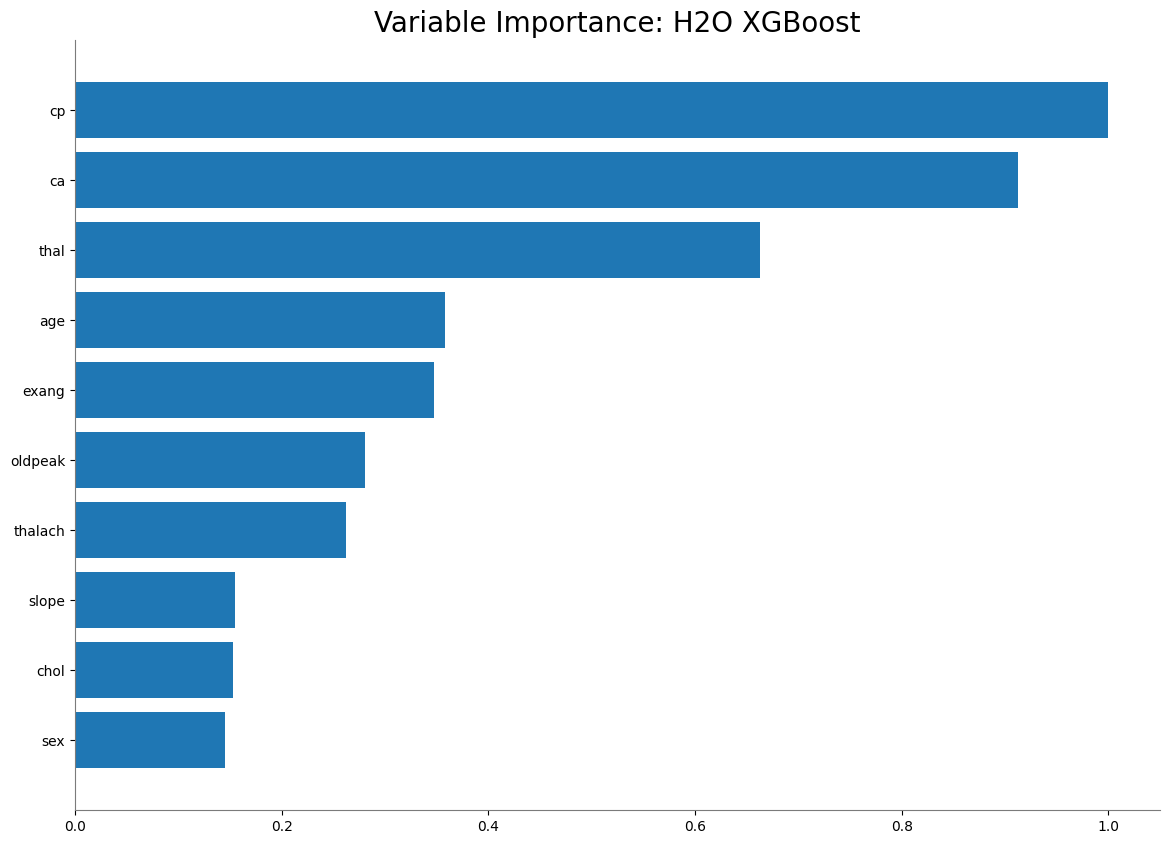

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot variables in order of their importance for heart-disease prediction
if best_model1.algo in ['deeplearning','gbm','drf','xrt','xgboost', 'glm']:
    best_model1.varimp_plot()

## **SHAP**


**SHAP (SHapley Additive exPlanations)** values are a concept from cooperative game theory and are widely used in machine learning for interpreting the output of models, particularly complex models like ensemble methods and neural networks. SHAP values aim to attribute the prediction of a specific instance to each feature, providing insights into the contribution of individual features to the model's output.

Here's an explanation of the values you might encounter when working with SHAP:

**SHAP Values for Features**:

SHAP values are calculated for each feature in the dataset for a specific instance. These values represent the impact of each feature on the model's output for that particular instance.

**Mean SHAP Value**:

The mean SHAP value is the average SHAP value across all instances in the dataset. It provides an overall indication of the average impact of each feature on model predictions.


**Interpretation of SHAP Values**:

A positive SHAP value for a specific feature indicates that the presence of that feature contributes positively to the model's output for a particular instance. Conversely, a negative SHAP value suggests a negative contribution.

The magnitude of the SHAP value indicates the strength of the contribution. Larger absolute values imply a more significant impact on the model's output.

**Sum of SHAP Values**:

The sum of SHAP values for a prediction is equal to the difference between the model's output for that instance and the expected model output (mean prediction). It provides a way to understand how the contributions of individual features add up to the overall model prediction.
Plotting SHAP Summary Plot:

A SHAP summary plot is often used to visualize the impact of features on model predictions. It displays a summary of the mean absolute SHAP values for each feature, highlighting the most influential features.


**SHAP Dependence Plot**:

SHAP dependence plots show the relationship between the value of a feature and the corresponding SHAP values. They help visualize how changes in a specific feature affect the model's output.


**SHAP Interaction Values**:

SHAP interaction values extend the concept to understand interactions between pairs of features and how these interactions influence model predictions.


**Kernel SHAP**:

Kernel SHAP is a specific implementation of SHAP values that approximates them by sampling subsets of features. It is computationally efficient and widely used in practice.

In [ ]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
!pip install shap
import shap
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

### **Intuition of Model Interpretation Using SHAP**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_features, dataset['target'], test_size=0.1, shuffle=False) #revert
categorical_features = ['sex']
numerical_features = [c for c in X_train.columns if c not in categorical_features]
cat = [([c], [SimpleImputer(strategy='constant', fill_value=0),
              OrdinalEncoder()]) for c in categorical_features]
num = [([n], [SimpleImputer(), StandardScaler()]) for n in numerical_features]
mapper = DataFrameMapper(num + cat, df_out=True)
reg = LinearRegression()
pipeline = Pipeline([
    ('preprocess', mapper),
    ('reg', reg)
])
p = pipeline.fit(X_train, y_train)

In [ ]:
nan_frame = pd.DataFrame(columns=categorical_features+numerical_features, index=[0])
nan_frame

,sex,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
base_value = round(pipeline.predict(nan_frame)[0], 3)
print(f"Expected value of the output (base value): {base_value}")

Expected value of the output (base value): 0.332


In [ ]:
#Actual Values
X_test.iloc[0: 1]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
271,66,1,4,160,228,0,2,138,0,2.3,1,0,6


In [ ]:
#Comparison of the actual and predicted value from the Linear Model
sample_prediction = round(pipeline.predict(X_test.iloc[0: 1])[0], 3)
print(f"Current Prediction: {sample_prediction}, Actual value: {y_test.iloc[0]}")

Current Prediction: 0.697, Actual value: 0


###Partial Dependency Plots

In [ ]:
explainer = shap.Explainer(pipeline.predict, X_train.astype(float))
shap_values = explainer(X_test.astype(float))

PermutationExplainer explainer: 31it [00:50,  2.29s/it]


In [ ]:
def partial_dependence_plot(feature, idx=None):
    if idx is None: # visualize all samples
        shap.plots.partial_dependence(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True)
    else: # visualize sample idx
        shap.partial_dependence_plot(
            feature,
            pipeline.predict,
            X_train,
            ice=False,
            model_expected_value=True,
            feature_expected_value=True,
            shap_values=shap_values[idx:idx+1,:])

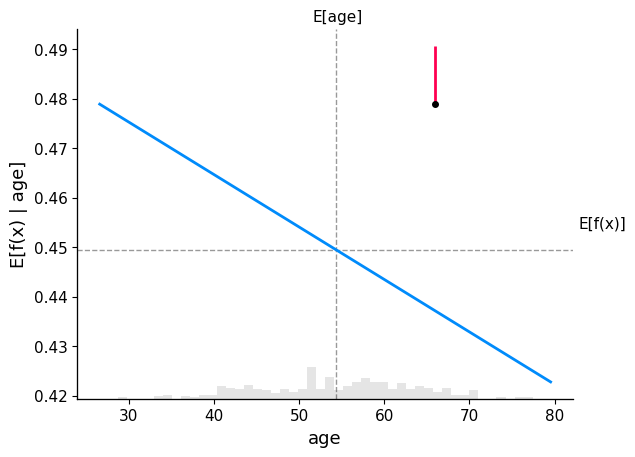

In [ ]:
partial_dependence_plot('age', 0)

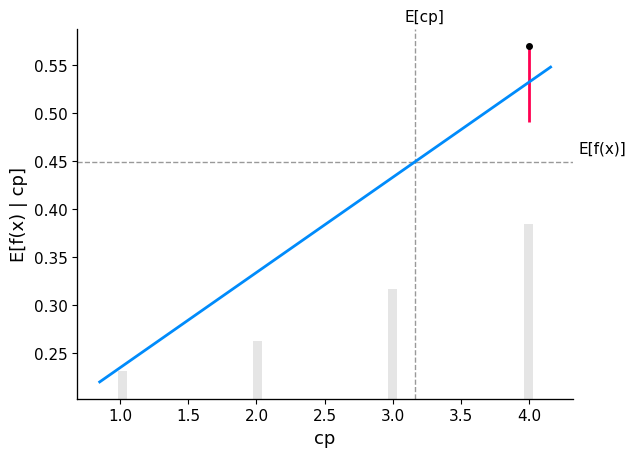

In [ ]:
partial_dependence_plot('cp', 0)

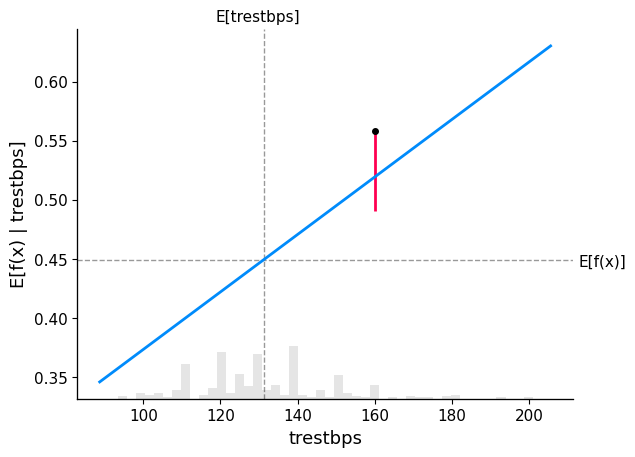

In [ ]:
partial_dependence_plot('trestbps', 0)

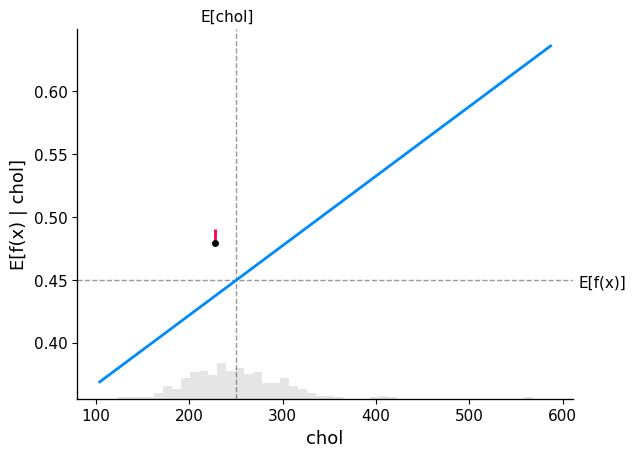

In [ ]:
partial_dependence_plot('chol', 0)

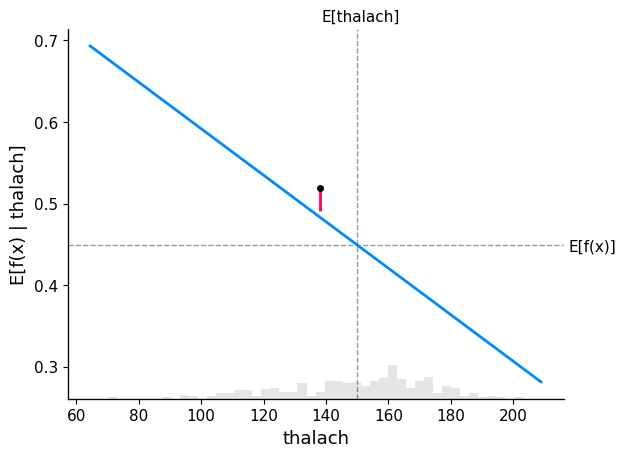

In [ ]:
partial_dependence_plot('thalach', 0)

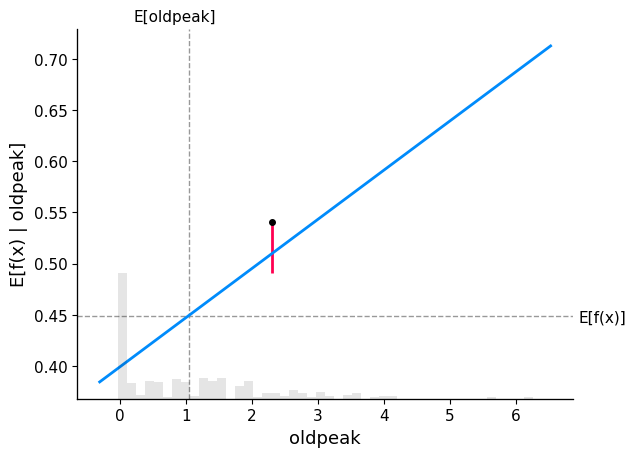

In [ ]:
partial_dependence_plot('oldpeak', 0)

In [ ]:
shap.initjs()

In [ ]:
def sample_feature_importance(idx, type='condensed'):
    if type == 'condensed':
        return shap.plots.force(shap_values[idx])
    elif type == 'waterfall':
        return shap.plots.waterfall(shap_values[idx])
    else:
        return "Return valid visual ('condensed', 'waterfall')"

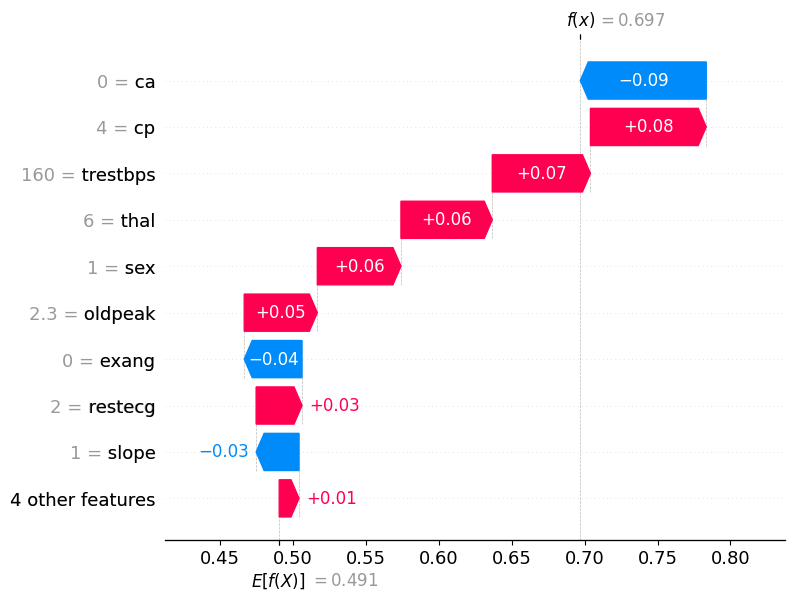

In [ ]:
sample_feature_importance(0, 'waterfall')

In [ ]:
sample_feature_importance(0, 'condensed')

### Feature Importance for model

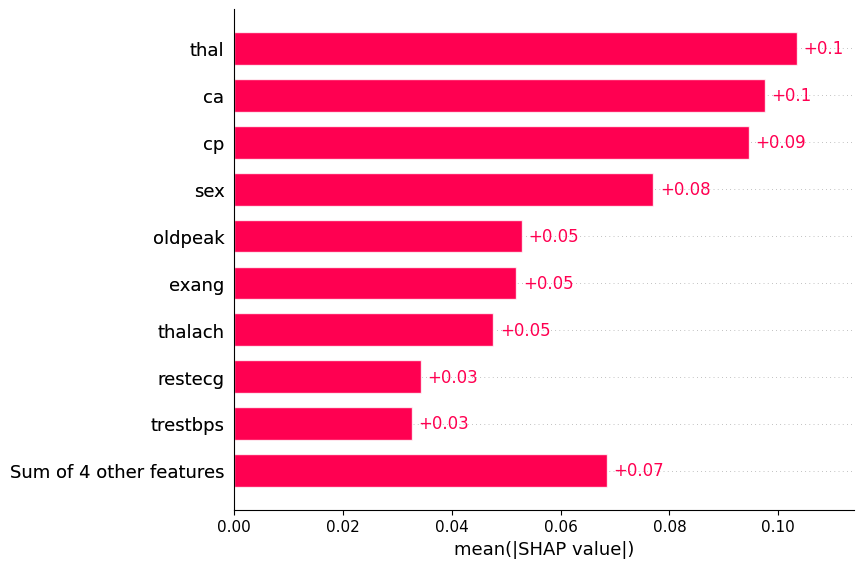

In [ ]:
shap.plots.bar(shap_values)

A SHAP (SHapley Additive exPlanations) value of 0.1 for thal in the model  means that, on average, the presence of that feature contributes positively to the model's output, and its contribution is 0.1 units.

Here's a more detailed explanation:

Positive Value (0.1): A positive SHAP value indicates that the presence of the feature contributes positively to the model's output for the given instance. In other words, the model's prediction for that instance is higher than the expected prediction (the mean prediction) due to the influence of this particular feature.

Magnitude (0.1): The magnitude of the SHAP value (0.1) indicates the strength of the contribution. In this case, the contribution is relatively moderate, with a positive impact of 0.1 units on the model's output.

Compared to Mean Prediction: The SHAP value is often interpreted relative to the mean prediction. For instance, a SHAP value of 0.1 means that, on average, the presence of this feature leads to a prediction that is 0.1 units higher than the mean prediction.

Directionality: If the SHAP value were negative (-0.1), it would imply a negative contribution, suggesting that the presence of the feature leads to a prediction 0.1 units lower than the mean prediction.

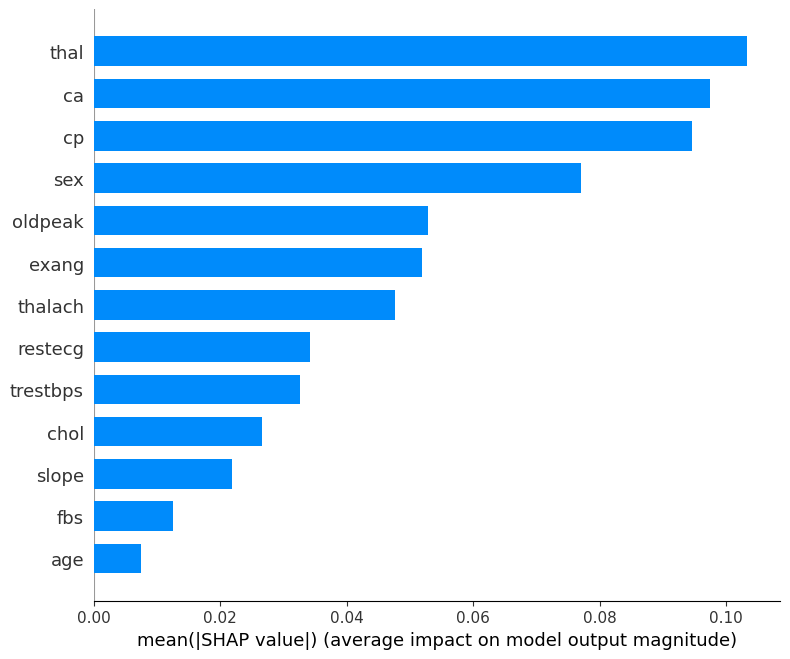

In [ ]:
shap.summary_plot(shap_values.values, X_train, plot_type='bar')

A SHAP (SHapley Additive exPlanations) summary plot is a visualization tool that provides a concise and comprehensive overview of the average impact of each feature on the model's output across all instances in a dataset. The summary plot helps in understanding which features are most influential in driving predictions and their respective contributions.

Here's an explanation of the key components of a SHAP summary plot:

Feature Importance Bar Plot:

The plot typically consists of a horizontal bar chart where each bar represents a feature.
The length of each bar corresponds to the average absolute SHAP value for that feature across all instances.
Longer bars indicate features with a higher average impact on the model's predictions.
Color Coding:

Features are color-coded based on their value for a specific instance.
Positive SHAP values (indicating positive contributions) are often colored in one shade (e.g., blue), and negative SHAP values (indicating negative contributions) in another shade (e.g., red).
The intensity of the color may represent the magnitude of the SHAP value.
Reference Point:

A reference point (usually marked as a vertical dashed line) represents the model's expected output or the mean prediction across all instances.
Features with positive SHAP values contribute to predictions higher than the reference point, while features with negative SHAP values contribute to predictions lower than the reference point.
Ordering of Features:

Features are ordered on the y-axis based on their importance, with the most influential features at the top.
The importance is determined by the sum of the average absolute SHAP values across all instances.
Interaction Effects (Optional):

Some SHAP summary plots include interaction effects, showing how pairs of features interact to influence predictions.
Interaction effects can be visualized as scatter plots or additional bars on the feature importance plot.
Summary Statistics:

The plot may include summary statistics, such as the mean absolute SHAP values for the entire dataset or the number of instances where each feature has a positive or negative impact.

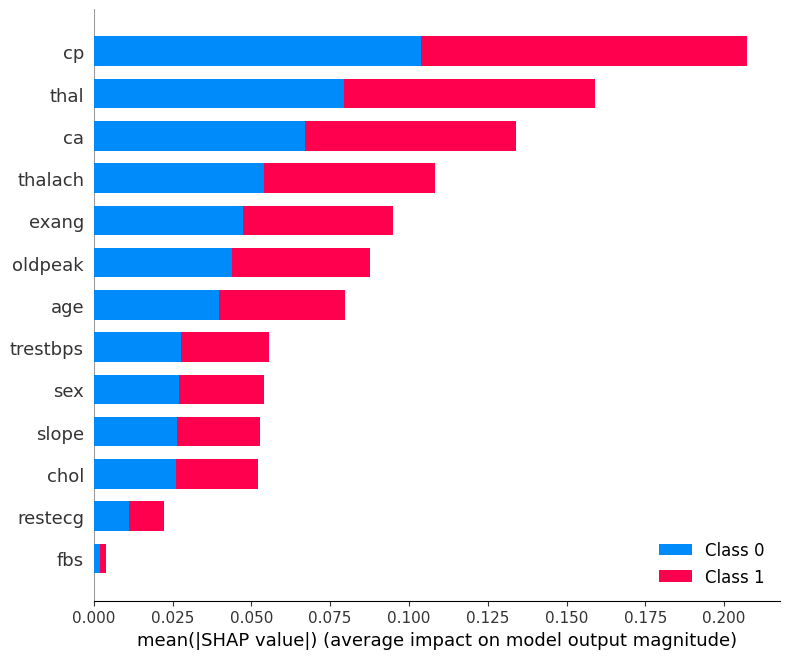

In [ ]:
#SHAP Plot for RF Model
explainer = shap.Explainer(model_randomForest, X_train.astype(float))
shap_values = explainer.shap_values(X_train.astype(float), check_additivity=False)
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [ ]:
class H2OProbWrapper:
    def __init__(self, h2o_model, feature_names):
        self.h2o_model = h2o_model
        self.feature_names = feature_names

    def predict_binary_prob(self, X):
        if isinstance(X, pd.Series):
            X = X.values.reshape(1,-1)
        self.dataframe= pd.DataFrame(X, columns=self.feature_names)
        self.predictions = self.h2o_model.predict(h2o.H2OFrame(self.dataframe)).as_data_frame().values
        return self.predictions.astype('float64')[:,-1] #probability of True class

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |

███████████████████████████████████████████████████| (done) 100%


  0%|          | 0/10 [00:00<?, ?it/s]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
Parse progress: |█████████████████████████████████

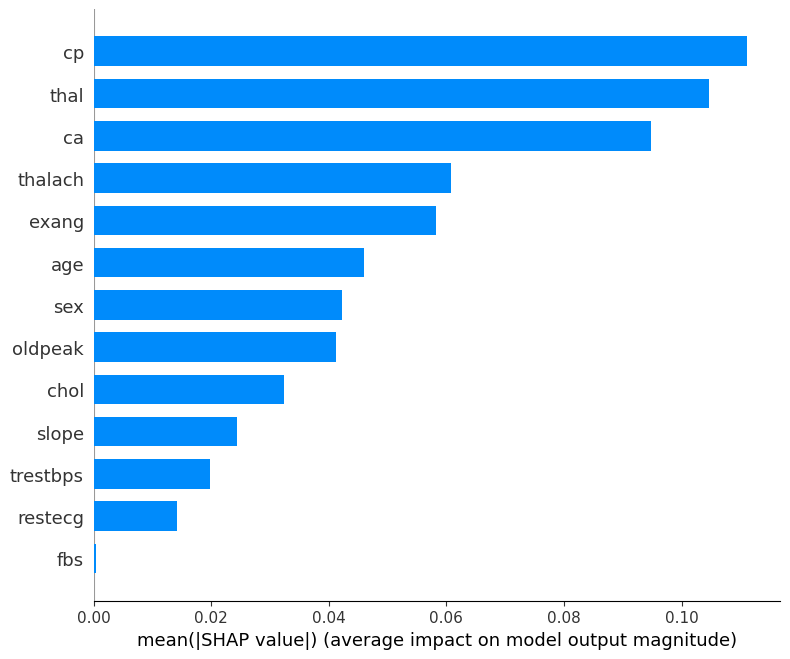

In [ ]:
#shap plot for automl
best_auto_ml_model = aml.leader
h2o_wrapper = H2OProbWrapper(best_auto_ml_model , list(data_features))
explainer = shap.KernelExplainer(h2o_wrapper.predict_binary_prob, X_train.astype(float), n_jobs=-1)
sample_size = min(10, X_train.shape[0])
shap_values = explainer.shap_values(X_train.sample(sample_size).astype(float), check_additivity=False)
shap.summary_plot(shap_values, X_test, plot_type='bar')

Interpreting the above graph is very crucial for this scenario as we can see that running the Kernel Explainer for SHAP Analysis on the sample_size = 10 for the AutoML can explain the disparity in the over reliance of the model in explaining the output values from the dependent variable 'cp' whose importance couldn't be determined in the above scenarios. This can further open up the opportunities for further analysis the reasoning behind this disparity. In conclusion, we can say that the SHAP explainer has not done a good job in explaining the values on the AutoML Model as we have just picked up a sample_size which is very less than the actual values on which the model has been trained on.

## Licensing and References

LICENSE
MIT License

Copyright (c) 2023 Tarun Angrish

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

REFERENCES
SHAP - https://shap.readthedocs.io/

AutoML - https://auto-ml.readthedocs.io/en/latest/

Professor's Reference Notebook - https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb
